# Overview

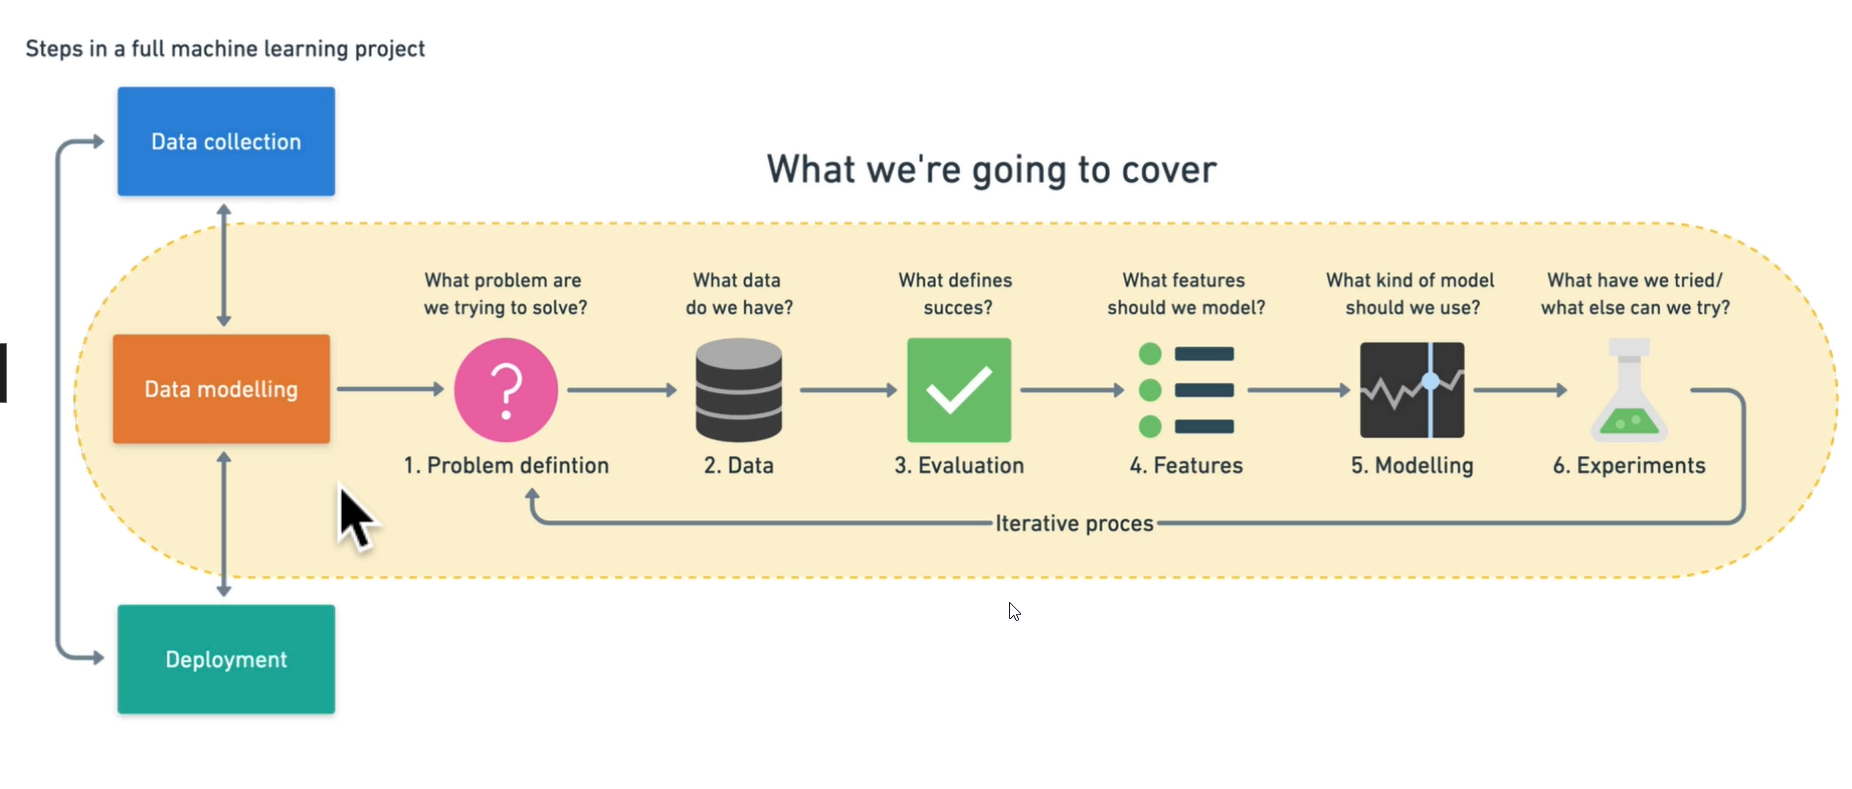

# 1. Problem Defination

Finding out if someone has heart disease or not based on given data 

# 2. Data

### Exploratory Data Analysis

#### Different Parameters

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   - serum = LDL + HDL + .2 * triglycerides
   - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality
       - can range from mild symptoms to severe problems
       - signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy
       - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   - 0: Upsloping: better heart rate with excercise (uncommon)
   - 1: Flatsloping: minimal change (typical healthy heart)
   - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
   -  colored vessel means the doctor can see the blood passing through
   -  the more blood movement the better (no clots)
13. thal - thalium stress result
   -  1,3: normal
   -  6: fixed defect: used to be defect but ok now
   -  7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Heart_disease = pd.read_csv("heart.csv")

In [2]:
Heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
Heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.( 0 ,1 ) = ( No , Yes Disease )

In [4]:
Heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
Heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
Heart_disease.index

RangeIndex(start=0, stop=1025, step=1)

In [7]:
Heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
Heart_disease.shape

(1025, 14)

In [9]:
Heart_disease["cp"].sum()

966

In [10]:
Heart_disease["cp"].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [11]:
Heart_disease.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
## Finding Null Value
Heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
## Maximum and Minimum heart rate achieved
Max = Heart_disease["thalach"].max()
Min = Heart_disease["thalach"].min()
Value = Heart_disease["thalach"].value_counts()

(Max, Min) , Value



((202, 71),
 162    35
 160    31
 163    29
 173    28
 152    28
        ..
 194     3
 185     3
 106     3
 88      3
 113     3
 Name: thalach, Length: 91, dtype: int64)

In [14]:
Heart_disease["oldpeak"].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

In [15]:
Oldpeak_min = Heart_disease["oldpeak"].min()
Oldpeak_max = Heart_disease["oldpeak"].max()

Oldpeak_min, Oldpeak_max

(0.0, 6.2)

In [16]:
## How many patient there is who has( 0 = normal; 1 = fixed defect; 2 = reversable defect )

Heart_disease["thal"].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [17]:
Heart_disease["oldpeak"].value_counts()

## Value And Number of Counts with this Value

0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64

In [18]:
## How many each class there is
Heart_disease["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

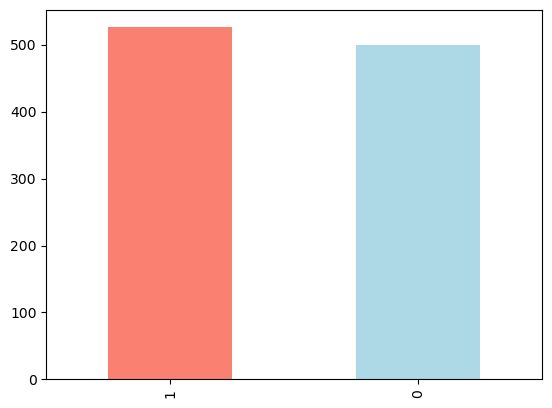

In [19]:
Heart_disease["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [20]:
## Comparing Target and Sex Values

Heart_disease["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [21]:
pd.crosstab(Heart_disease.target , Heart_disease.sex)

sex,0,1
target,,
0,86,413
1,226,300


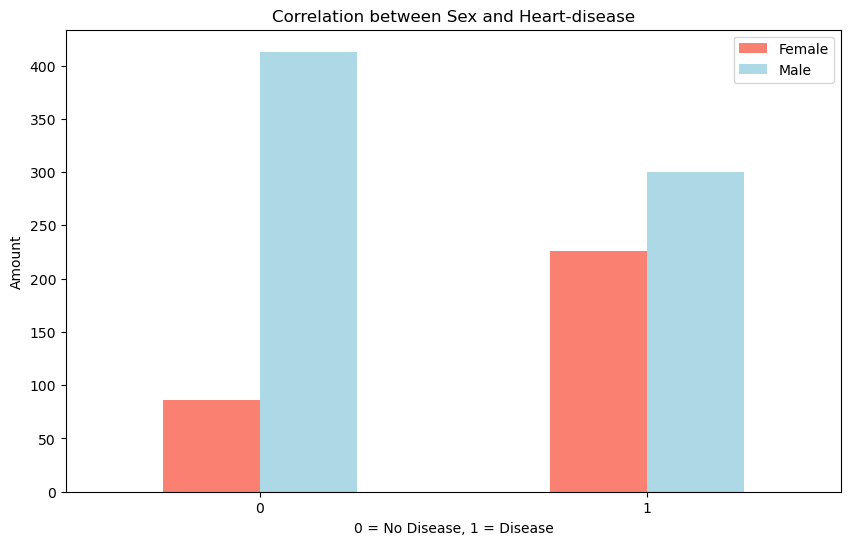

In [22]:
pd.crosstab(Heart_disease.target , Heart_disease.sex).plot(kind="bar", 
                                                           figsize=(10,6),
                                                           color=["salmon", "lightblue"]);
plt.title("Correlation between Sex and Heart-disease")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

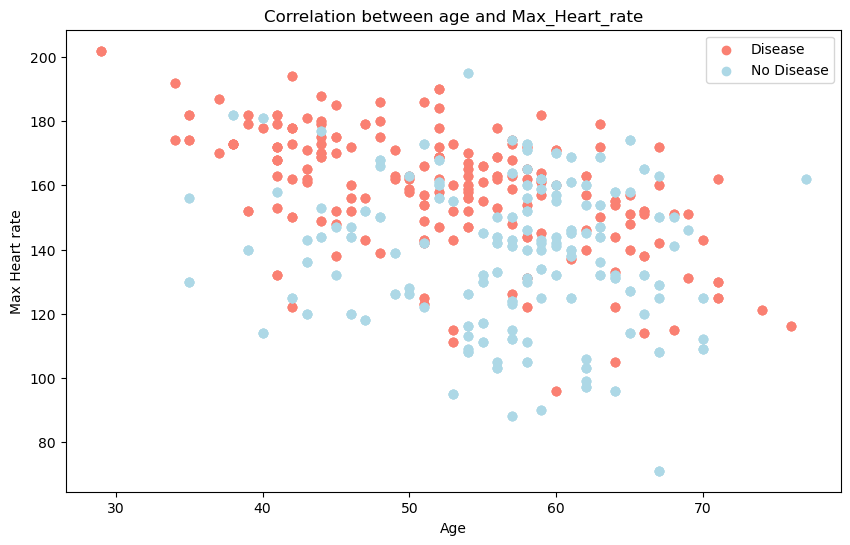

In [23]:
## Age & Heart_disease correlation
plt.figure(figsize=(10,6))

## Of positive result
plt.scatter(Heart_disease.age[Heart_disease.target == 1],
           Heart_disease.thalach[Heart_disease.target == 1],
           color= "salmon");

## of Negative result
plt.scatter(Heart_disease.age[Heart_disease.target == 0],
           Heart_disease.thalach[Heart_disease.target == 0],
           color= "lightblue");

plt.title("Correlation between age and Max_Heart_rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

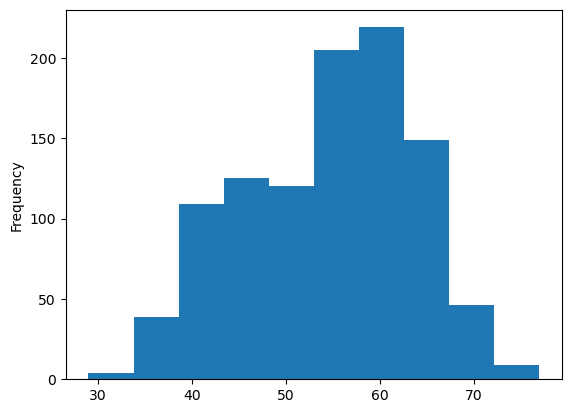

In [24]:
Heart_disease.age.plot.hist()

## correlation between Heart_disease & Chest Pain.
cp - chest pain type
   - 0: Typical angina: chest pain related decrease blood supply to the heart
   - 1: Atypical angina: chest pain not related to heart
   - 2: Non-anginal pain: typically esophageal spasms (non heart related)
   - 3: Asymptomatic: chest pain not showing signs of disease


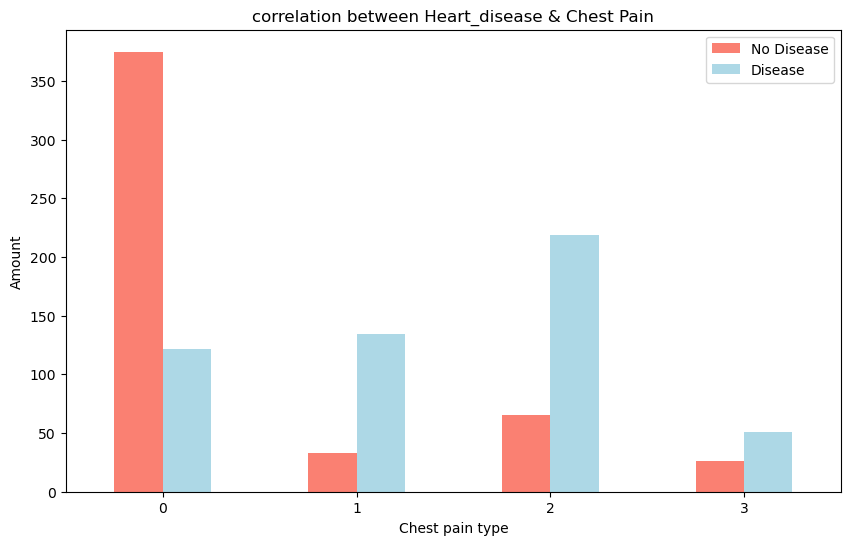

In [25]:
pd.crosstab(Heart_disease.cp , Heart_disease.target).plot(kind= "bar",
                                                          figsize = (10, 6),
                                                          color = ["salmon", "lightblue"]
                                                         )
plt.title("correlation between Heart_disease & Chest Pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [26]:
## Correlation
Heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


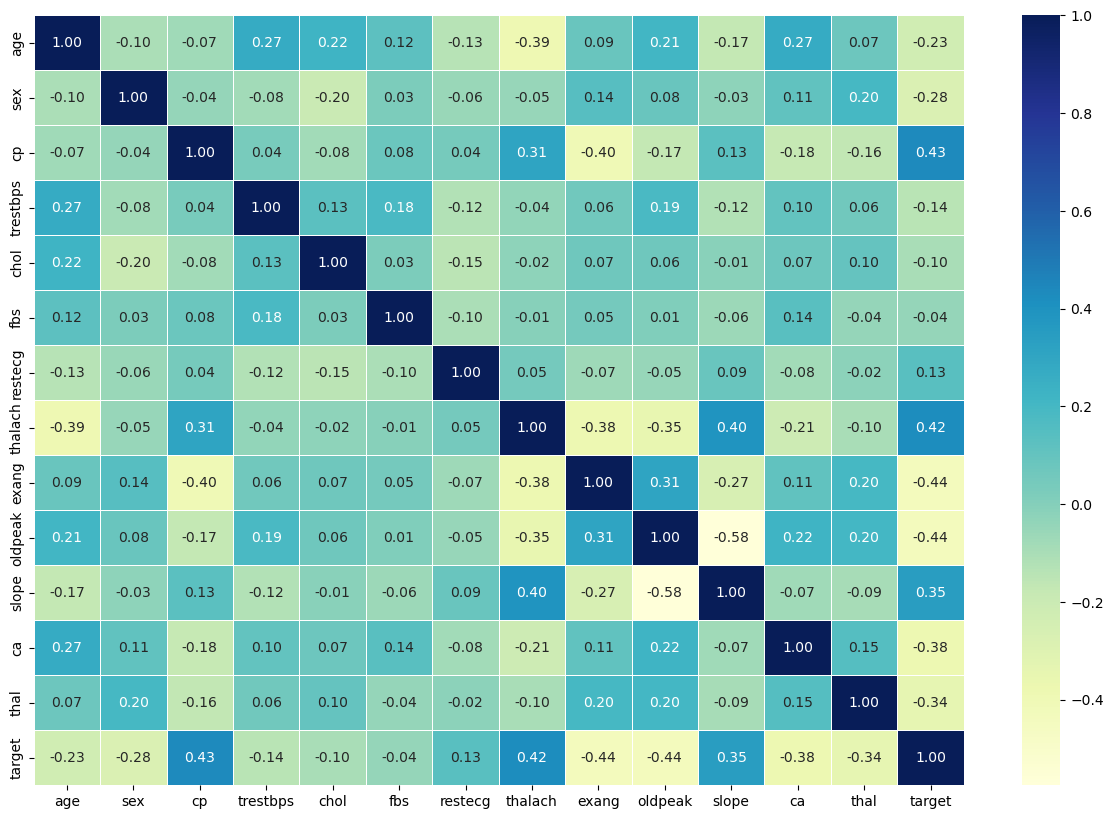

In [27]:
Corr_matrix = Heart_disease.corr()
fig, ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(Corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu"
                );                     

# 3. Evaluation

- If Patient has 95% accuracy of having heart-disease or not 

# 4. Features

# 5. Modelling & Experiments

In [28]:
## Creating X and Y

X = Heart_disease.drop("target", axis=1)
y = Heart_disease["target"]

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

## Split data into train and test sets
np.random.seed(42)

## Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [33]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

## Picking the machine learning model from, 

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [34]:
## Importing a Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# We want our plots to appear in the notebook
%matplotlib inline 

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [35]:
## Puting Models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

## Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    ## Set random Seed
    np.random.seed(42)
    ## Make a dictionary to keep model scores
    model_scores = {}
    ## Loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [36]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\praja\Data_science\Projects\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

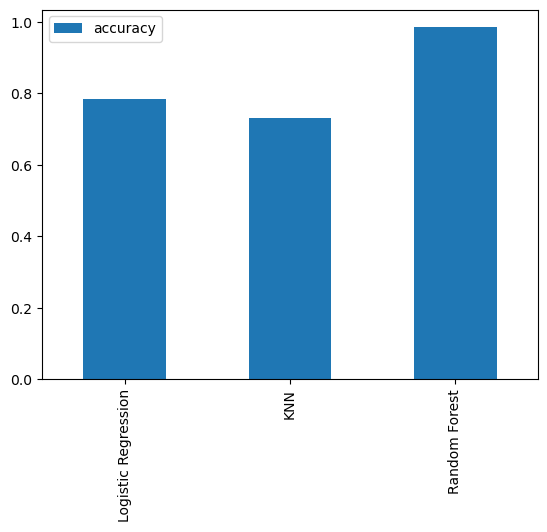

In [41]:
## Model Compariosn

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();